Constant is somithing i wont be able to change at any point of time in runtime.

# Tensorflow 1.x

create conda environment

![Screenshot 2023-05-13 175525.png](<attachment:Screenshot 2023-05-13 175525.png>)
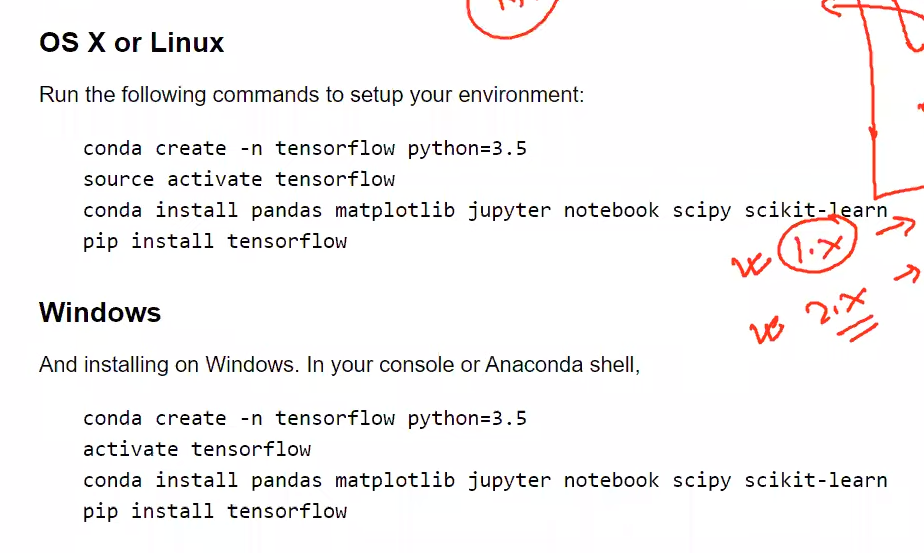

In [2]:
import tensorflow as tf

In [4]:
hello_constant = tf.constant("hello world")

In [5]:
hello_constant

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

Tensorflow follow lazy evalution

In [13]:
import tensorflow as tf
# code to run in tf ==1.0
# Create TensorFlow object caller tensor

hello_constant = tf.constant("Hello World !")

with tf.Session() as sess:
    #ru n the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

AttributeError: module 'tensorflow' has no attribute 'Session'

## Tensor 
In TensorFlow , data isnt stored as int , float or strings . These values are encapsulated in as object called tensor.
In the case of hello_consttant = tf.constant('Hello World! '), hello_constant is a 0-dimensional string tensor , but tensors come in a variety of sizes as shown below.

In [16]:
# A is 0- dimensional int32 tensor
A= tf.constant(1234)

# B is 1-dimenional int32 tensor
B = tf.constant([123,456,789])

# C is a 2-dimensional int32 tensor
C = tf.constant([[123,456,789],[333,555,666]])


### tf.placeholder() <br>
It is also tyoe of variable like constant. In constant you have to pass data  to variable.<br>
while using placeholer you have to pass data type to variable

In [18]:
A = tf.constant(467647)
x = tf.placeholder(tf.string)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [19]:
x = tf.placeholder(tf.int64)
with tf.Session() as sess:
    output = sess.run(x , feed_dict={x: 455546})


AttributeError: module 'tensorflow' has no attribute 'placeholder'

Use the feed_dict parameter in tf.session.run() to set the placeholder tensor. The above example shows the tensor x being set ti the string "Hello world". 
Its also possible to set more than one tensor using feed_dict


In [ ]:
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)

with tf.Sesson as sess:
    # x , y and z are keys in below code
    output_x = sess.run(x, feed_dict=[x: 'test string', y : 123 , z:45.67])
    output_y = sess.run(y, feed_dict=[y: 'test string', y : 123 , z:45.67])
    print(output_x)
    print(output_y)
    

Note : If the data passed to the feed_dict doesnt match the tensor type and cant be cast into tensor type , you will get valueError

## TensorFlow Math

### Addition

In [22]:
X = tf.add(5 , 2)
X

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [23]:
x = tf.subtract(10, 4)

In [24]:
y = tf.multiply(2,5)

### Converting Types

In [26]:
tf.subtract(tf.constant(2.0) , tf.constant(5))

InvalidArgumentError: cannot compute Sub as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:Sub]

In [27]:
tf.subtract(tf.cast(tf.constant(2.0), tf.int32) , tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=-3>

In [28]:
x = tf.constant(10)
y = tf.constant(2)
z  = tf.subtract(tf.divide(x, y), 1)

In [29]:
z

<tf.Tensor: shape=(), dtype=float64, numpy=4.0>

### tf.Variable()
assigneed value to the tf.Variable can be changed later.

In [30]:
x = tf.Variable(5)

In [31]:
init = tf.global_variable_initializer()

withn tf.Session() as sess:
    sess.run(init)
    sess.run(x)


AttributeError: module 'tensorflow' has no attribute 'global_variable_initializer'

### tf.trucated_normal()

The tf.trucated_normal() function returns a tensor with random values from a normal dictribution whose magnitude is no more tha 2 standard deviation from the mean

In [33]:
n_features = 120
n_labels = 5

weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))
## this works like randint function of numpy

AttributeError: module 'tensorflow' has no attribute 'truncated_normal'

In [34]:
init = tf.global_variable_initializer()

withn tf.Session() as sess:
    sess.run(init)
    o = tf.trucated_normal((n_features, n_labels))
    print(o)
    
## it will create 120 rows and 5 fetures data

SyntaxError: invalid syntax (1987706723.py, line 3)

### tf.zeros()
create tension with all zeros

In [36]:
n_labels = 5

bias = tf.Variable(tf.zeros(n_labels))

In [37]:
bias

<tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

### Softmax function

tf.nn.softmax() implements the softmax function foryou. It takes in logits and returns softmax activations

In [38]:
x = tf.nn.softmax([2.0,1.0,0.2])

In [39]:
with tf.Session() as sess:
    o = sess.run()
    print(o)

AttributeError: module 'tensorflow' has no attribute 'Session'

### Softmax function

In [ ]:
import tensorflow as tf
def run_2():
    output = None 
    logit_data = [2.0,1.0,0.1]
    logits = tf.placeholder(tf.float32)

    # calculate softmax of the logits
    softmax = tf.nn.softmax(logits)
    
    with tf.Session as sess:
        # Feed in the logit data
        output = sess.run(softmax , feed_dict= {logits : logit_data})
        return output
print(run_2())


### One-Hot Encoding

In [41]:
import numpy as np

from sklearn import preprocessing

labels = np.array([3,4,4,5,6,7,8,9,0,4])
lb = preprocessing.LabelBinarizer()
lb.fit_transform(labels)

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

### TensorFlow Cross Entropy